<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


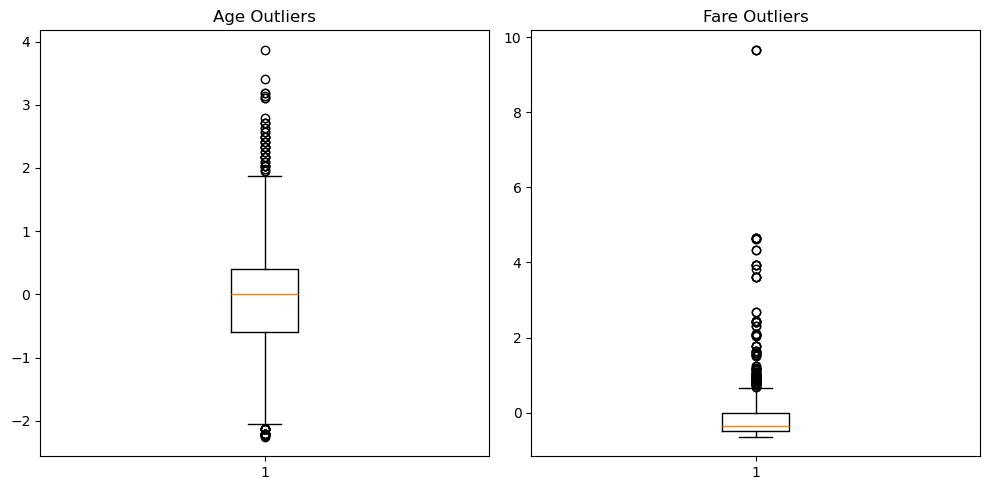

In [2]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt




df = pd.read_csv("Titanic.csv.csv")
df.head()  

df.info()        # Shows column types & non-null counts
df.isnull().sum()  # Count of missing values per column

# Fill missing Age with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Fill missing Embarked with mode (most frequent)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' column (too many missing values)
df = df.drop(columns=['Cabin'])


df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Age Outliers')

plt.subplot(1, 2, 2)
plt.boxplot(df['Fare'])
plt.title('Fare Outliers')

plt.tight_layout()
plt.show()






